# Note :    Riêng **Colab** phải **Ctrl+S** hoặc **Save** thì mới update được nha mọi người.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split


# 1.Data Preparation

## 1.1. Data Shuffling

### 1.1.1 Daily Activity


In [4]:
# Correct URL to the raw CSV file on GitHub
dailyActivity = pd.read_csv('../data/dailyActivity_merged.csv')
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [5]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [6]:
from sklearn.utils import shuffle

dailyActivity = shuffle(dailyActivity)
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
312,5577150313,4/10/2016,9776,7.38,7.38,0.0,2.93,1.43,3.02,0.0,80,35,162,721,3378
440,8792009665,4/8/2016,1467,0.94,0.94,0.0,0.10,0.21,0.63,0.0,2,8,71,912,1953
76,2022484408,4/5/2016,10805,7.59,7.59,0.0,0.72,0.98,5.89,0.0,36,37,298,1069,2735
90,2026352035,4/7/2016,2767,1.72,1.72,0.0,0.00,0.00,1.72,0.0,0,0,170,673,1392
355,6962181067,4/2/2016,12437,8.30,8.30,0.0,3.76,1.29,3.24,0.0,50,24,219,732,2115


### 1.1.2. Heart Rate Second

In [7]:
# Correct URL to the raw CSV file on GitHub
heartRate = pd.read_csv('../data/heartrate_seconds_merged.csv')
heartRate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [8]:
heartRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [9]:
from sklearn.utils import shuffle

heartRate = shuffle(heartRate)
heartRate.head()

,Id,Time,Value
2319655,8877689391,4/19/2016 8:43:19 PM,68
1055588,5553957443,4/14/2016 7:25:20 AM,81
2066074,7007744171,4/24/2016 12:44:25 PM,110
2431152,8877689391,5/5/2016 10:57:47 AM,98
752830,4388161847,5/1/2016 1:44:20 PM,79


### 1.1.3. Hourly Calories

In [10]:
# Correct URL to the raw CSV file on GitHub
hourlyCalories = pd.read_csv('../data/hourlyCalories_merged.csv')
hourlyCalories.head()

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48


In [11]:
hourlyCalories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24084 entries, 0 to 24083
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24084 non-null  int64 
 1   ActivityHour  24084 non-null  object
 2   Calories      24084 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 564.6+ KB


In [12]:
from sklearn.utils import shuffle

hourlyCalories = shuffle(hourlyCalories)
hourlyCalories.head()

,Id,ActivityHour,Calories
10066,4057192912,3/28/2016 3:00:00 AM,74
1699,1644430081,3/20/2016 8:00:00 AM,84
21564,8378563200,3/28/2016 11:00:00 PM,91
4633,2026352035,3/19/2016 5:00:00 AM,47
15143,6117666160,3/24/2016 11:00:00 PM,73


### 1.1.4. Hourly Intensities

In [13]:
# Correct URL to the raw CSV file on GitHub
hourlyIntensities = pd.read_csv('../data/hourlyCalories_merged.csv')
hourlyIntensities.head()

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48


In [14]:
hourlyIntensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24084 entries, 0 to 24083
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24084 non-null  int64 
 1   ActivityHour  24084 non-null  object
 2   Calories      24084 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 564.6+ KB


In [15]:
from sklearn.utils import shuffle

hourlyIntensities = shuffle(hourlyIntensities)
hourlyIntensities.head()

,Id,ActivityHour,Calories
19768,8053475328,3/16/2016 9:00:00 AM,73
22546,8583815059,4/7/2016 11:00:00 AM,95
260,1503960366,3/22/2016 8:00:00 PM,83
11883,4558609924,3/13/2016 5:00:00 AM,56
12519,4558609924,4/8/2016 5:00:00 PM,60


### 1.1.5. Sleep Day

In [16]:
# Correct URL to the raw CSV file on GitHub
sleepDay = pd.read_csv('../data/sleepDay_merged.csv')
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [17]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [18]:
from sklearn.utils import shuffle

sleepDay = shuffle(sleepDay)
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
187,4445114986,5/5/2016 12:00:00 AM,2,462,513
129,4319703577,4/27/2016 12:00:00 AM,1,286,307
302,6117666160,5/9/2016 12:00:00 AM,1,492,522
271,5577150313,4/24/2016 12:00:00 AM,1,543,615
264,5577150313,4/17/2016 12:00:00 AM,1,549,583


### 1.1.6. Weight Info

In [19]:
# Correct URL to the raw CSV file on GitHub
weightLogInfo = pd.read_csv('../data/weightLogInfo_merged.csv')
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [20]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [21]:
from sklearn.utils import shuffle

weightLogInfo = shuffle(weightLogInfo)
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
40,6962181067,5/10/2016 11:59:59 PM,62.099998,136.907061,NaN,24.240000,True,1462924799000
56,8877689391,4/28/2016 6:50:03 AM,85.099998,187.613382,NaN,25.490000,False,1461826203000
32,6962181067,5/2/2016 11:59:59 PM,61.500000,135.584291,NaN,24.000000,True,1462233599000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
14,6962181067,4/13/2016 11:59:59 PM,62.099998,136.907061,NaN,24.240000,True,1460591999000


## 1.2. Data Preprocessing

### 1.2.1. Cleaning the datasets

#### 1.2.1.a. Convert all the date columns into datetime object and rename it as ActivityDate

In [22]:
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'])

In [61]:
def process_dataframe(df):
    # converting date column to datetime
    date_col = df.columns[1]
    df[date_col] = pd.to_datetime(df[date_col])

    # Creating separate 'date' and 'time' columns
    df['ActivityDate'] = df[date_col].dt.date
    df['ActivityTime'] = df[date_col].dt.strftime('%I:%M:%S %p')
    df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
    df.drop(columns=[date_col],inplace=True)

    return df

dataframes = [ sleepDay, hourlyCalories, hourlyIntensities, heartRate, weightLogInfo]

for i, df in enumerate(dataframes):
    dataframes[i] = process_dataframe(df)

for i, df in enumerate(dataframes, 1):
    print(f"DataFrame {i}:\n", df.head())
    print(df['ActivityDate'].dtypes)

DataFrame 1:
              Id  TotalMinutesAsleep  TotalTimeInBed ActivityDate ActivityTime
187  4445114986                 462             513   1970-01-01  12:00:00 AM
129  4319703577                 286             307   1970-01-01  12:00:00 AM
302  6117666160                 492             522   1970-01-01  12:00:00 AM
271  5577150313                 543             615   1970-01-01  12:00:00 AM
264  5577150313                 549             583   1970-01-01  12:00:00 AM
datetime64[ns]
DataFrame 2:
                Id ActivityDate ActivityTime
10066  4057192912   1970-01-01  12:00:00 AM
1699   1644430081   1970-01-01  12:00:00 AM
21564  8378563200   1970-01-01  12:00:00 AM
4633   2026352035   1970-01-01  12:00:00 AM
15143  6117666160   1970-01-01  12:00:00 AM
datetime64[ns]
DataFrame 3:
                Id ActivityDate ActivityTime
19768  8053475328   1970-01-01  12:00:00 AM
22546  8583815059   1970-01-01  12:00:00 AM
260    1503960366   1970-01-01  12:00:00 AM
11883  4558609924   

#### 1.2.1.b.  Check if there are any duplicate records

In [59]:
grouped = dailyActivity.groupby(['Id', 'ActivityDate']).size().reset_index(name='Count')
duplicates = grouped[grouped['Count'] > 1]
print("\n Duplicates in activity record:")
print(duplicates)

grouped1 = sleepDay.groupby(['Id', 'ActivityDate','ActivityTime','TotalSleepRecords']).size().reset_index(name='Count')
duplicates1 = grouped1[grouped1['Count'] > 1]
print("\nDuplicates in sleep record:")
print(duplicates1)

grouped2 = hourlyCalories.groupby(['Id', 'ActivityDate','ActivityTime']).size().reset_index(name='Count')
duplicates2 = grouped2[grouped2['Count'] > 1]
print("\nDuplicates in hourly calories record:")
print(duplicates2)


grouped3 = hourlyIntensities.groupby(['Id', 'ActivityDate','ActivityTime']).size().reset_index(name='Count')
duplicates3 = grouped3[grouped3['Count'] > 1]
print("\nDuplicates in hourly intensities record:")
print(duplicates3)

grouped4 = heartRate.groupby(['Id', 'ActivityDate','ActivityTime']).size().reset_index(name='Count')
duplicates4 = grouped4[grouped4['Count'] > 1]
print("\nDuplicates in heartrate seconds record:")
print(duplicates4)

grouped5 = weightLogInfo.groupby(['Id', 'ActivityDate','ActivityTime']).size().reset_index(name='Count')
duplicates5 = grouped5[grouped5['Count'] > 1]
print("\nDuplicates in weightLogInfo seconds record:")
print(duplicates5)


 Duplicates in activity record:
Empty DataFrame
Columns: [Id, ActivityDate, Count]
Index: []

Duplicates in sleep record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, TotalSleepRecords, Count]
Index: []

Duplicates in hourly calories record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, Count]
Index: []

Duplicates in hourly intensities record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, Count]
Index: []

Duplicates in heartrate seconds record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, Count]
Index: []

Duplicates in weightLogInfo seconds record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, Count]
Index: []


In [25]:
duplicate_records = sleepDay[sleepDay.set_index(['Id', 'ActivityDate', 'ActivityTime', 'TotalSleepRecords']).index.isin(duplicates1.set_index(['Id', 'ActivityDate', 'ActivityTime', 'TotalSleepRecords']).index)]
print("\nDuplicate records in the original DataFrame:")
print(duplicate_records)

# Removing the duplicate records from the original DataFrame
sleepDay.drop_duplicates(subset=['Id', 'ActivityDate', 'ActivityTime', 'TotalSleepRecords'], inplace=True)


Duplicate records in the original DataFrame:
             Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed  \
223  4702921684                  1                 520             543   
222  4702921684                  1                 520             543   
380  8378563200                  1                 388             402   
161  4388161847                  1                 471             495   
160  4388161847                  1                 471             495   
379  8378563200                  1                 388             402   

    ActivityDate ActivityTime  
223   2016-05-07  12:00:00 AM  
222   2016-05-07  12:00:00 AM  
380   2016-04-25  12:00:00 AM  
161   2016-05-05  12:00:00 AM  
160   2016-05-05  12:00:00 AM  
379   2016-04-25  12:00:00 AM  


##### Only the SleepDay dataset has duplicates.

In [26]:
import pandas as pd
import numpy as np

# Function to check for missing values including NaN, None, and empty strings
def check_missing_values(df):
    return {
        'null_values': df.isnull().values.sum(),
        'empty_strings': (df == '').values.sum(),
        'na_values': df.isna().values.sum()
    }

# Check for missing values in each DataFrame
print("Missing values in dailyActivity:")
print(check_missing_values(dailyActivity))

print("\nMissing values in sleepDay:")
print(check_missing_values(sleepDay))

print("\nMissing values in hourlyCalories:")
print(check_missing_values(hourlyCalories))

print("\nMissing values in hourlyIntensities:")
print(check_missing_values(hourlyIntensities))

print("\nMissing values in heartRate:")
print(check_missing_values(heartRate))

Missing values in dailyActivity:
{'null_values': 0, 'empty_strings': 0, 'na_values': 0}

Missing values in sleepDay:
{'null_values': 0, 'empty_strings': 0, 'na_values': 0}

Missing values in hourlyCalories:
{'null_values': 0, 'empty_strings': 0, 'na_values': 0}

Missing values in hourlyIntensities:
{'null_values': 0, 'empty_strings': 0, 'na_values': 0}

Missing values in heartRate:
{'null_values': 0, 'empty_strings': 0, 'na_values': 0}


#### Aggregate data in DailyActivity

In [27]:
dailyActivity['TotalActiveMinutes'] = dailyActivity['VeryActiveMinutes'] + dailyActivity['FairlyActiveMinutes'] + dailyActivity['LightlyActiveMinutes']

dailyActivity_final = dailyActivity[['TotalSteps', 'TotalDistance', 'TotalActiveMinutes','Calories']]

print(dailyActivity_final.head())

     TotalSteps  TotalDistance  TotalActiveMinutes  Calories
312        9776           7.38                 277      3378
440        1467           0.94                  81      1953
76        10805           7.59                 371      2735
90         2767           1.72                 170      1392
355       12437           8.30                 293      2115


#### 1.2.1.c. Clone into train&test file

In [28]:
import os

clone_directory = 'clone_data'
train_file_path1 = os.path.join(clone_directory, 'train_dailyActivity.csv')
train_file_path2 = os.path.join(clone_directory, 'train_heartRate.csv')
train_file_path3 = os.path.join(clone_directory, 'train_hourlyCalories.csv')
train_file_path4 = os.path.join(clone_directory, 'train_hourlyIntensities.csv')
train_file_path5 = os.path.join(clone_directory, 'train_sleepDay.csv')
train_file_path6 = os.path.join(clone_directory, 'train_weightInfo.csv')

test_file_path1 = os.path.join(clone_directory, 'test_dailyActivity.csv')
test_file_path2 = os.path.join(clone_directory, 'test_heartRate.csv')
test_file_path3 = os.path.join(clone_directory, 'test_hourlyCalories.csv')
test_file_path4 = os.path.join(clone_directory, 'test_hourlyIntensities.csv')
test_file_path5 = os.path.join(clone_directory, 'test_sleepDay.csv')
test_file_path6 = os.path.join(clone_directory, 'test_weightInfo.csv')

if not os.path.exists(clone_directory):
    os.makedirs(clone_directory)

dailyActivity.to_csv(train_file_path1)
heartRate.to_csv(train_file_path2)
hourlyCalories.to_csv(train_file_path3)
hourlyIntensities.to_csv(train_file_path4)
sleepDay.to_csv(train_file_path5)
weightLogInfo.to_csv(train_file_path6)

dailyActivity.to_csv(test_file_path1)
heartRate.to_csv(test_file_path2)
hourlyCalories.to_csv(test_file_path3)
hourlyIntensities.to_csv(test_file_path4)
sleepDay.to_csv(test_file_path5)
weightLogInfo.to_csv(test_file_path6)


# 2. Selection

In [29]:
# Daily
daily_train = pd.read_csv("../src/clone_data/train_dailyActivity.csv")
# Fill null value with the most popular value.
daily_train = daily_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# heart
heart_train = pd.read_csv("../src/clone_data/train_heartrate.csv")
heart_train = heart_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# calories
calories_train = pd.read_csv("../src/clone_data/train_hourlyCalories.csv")
calories_train = calories_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Intensities
intensities_train = pd.read_csv("../src/clone_data/train_hourlyIntensities.csv")
intensities_train = intensities_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# sleepDay
sleepDay_train = pd.read_csv("../src/clone_data/train_sleepDay.csv")
sleepDay_train = sleepDay_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# weight
weight_train = pd.read_csv("../src/clone_data/train_weightInfo.csv")
weight_train = weight_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

## 2.1. Information Gain

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

### 2.1.1. Daily Activity

Features: TotalDistance Score:  0.695190115958042
Features: TrackerDistance Score:  0.6802670394431432
Features: TotalSteps Score:  0.6449331792782633
Features: SedentaryMinutes Score:  0.5906801396489034
Features: TotalActiveMinutes Score:  0.5686294249307022
Features: LightlyActiveMinutes Score:  0.4479283057533583
Features: LightActiveDistance Score:  0.4183071394830513
Features: VeryActiveMinutes Score:  0.26353000302814644
Features: VeryActiveDistance Score:  0.178898691891348
Features: FairlyActiveMinutes Score:  0.1725426189440067
Features: ModeratelyActiveDistance Score:  0.12405029584353189
Features: LoggedActivitiesDistance Score:  0.036538253593978
Features: SedentaryActiveDistance Score:  0.007077962891897993


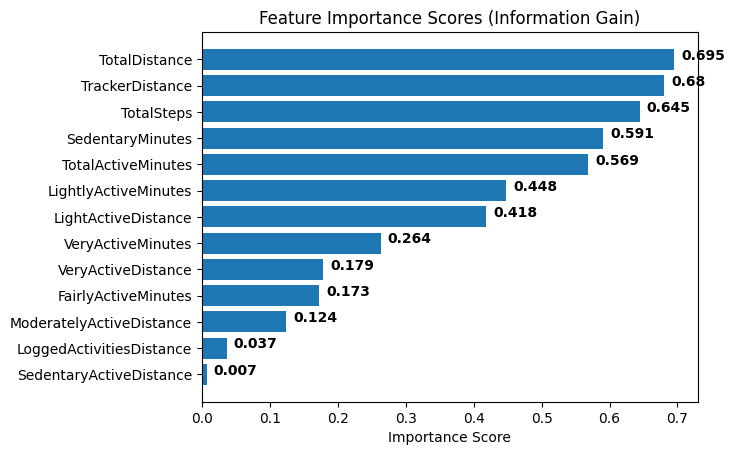

In [31]:
x = daily_train.drop(columns=["Unnamed: 0","Id","ActivityDate","Calories"])
y = daily_train["Calories"]

#Apply Information Gain
ig = mutual_info_regression(x,y)

#Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(x.columns)):
    feature_scores[x.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

#Sort the features by importance scores and the sorted features
for feature, score in sorted_features:
    print("Features:", feature, "Score: ", score)

#Plot a horizontal bar chat of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

### 2.1.2. Sleep Day

Features: TotalTimeInBed Score:  1.76683523970677
Features: TotalSleepRecords Score:  0.027940166178501702


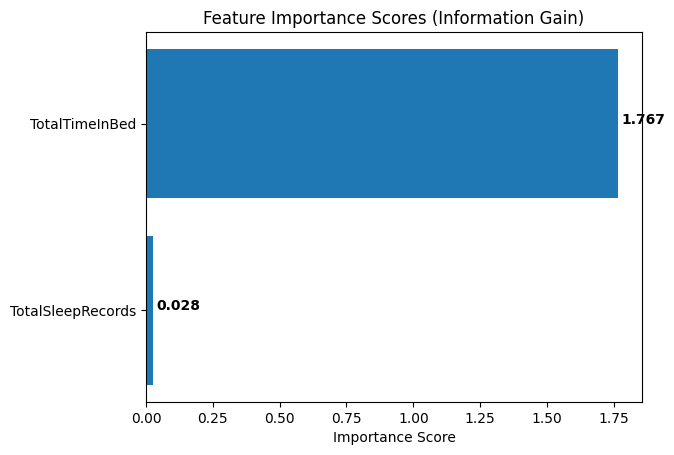

In [32]:
x = sleepDay_train.drop(columns=["Unnamed: 0","Id", "ActivityDate", "ActivityTime", "TotalMinutesAsleep"])
y = sleepDay_train["TotalMinutesAsleep"]

#Apply Information Gain
ig = mutual_info_regression(x,y)

#Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(x.columns)):
    feature_scores[x.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

#Sort the features by importance scores and the sorted features
for feature, score in sorted_features:
    print("Features:", feature, "Score: ", score)

#Plot a horizontal bar chat of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

## 2.2. Forward Selection

In [33]:
# from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
12313

NameError: name 'train_test_split' is not defined

## 2.3. Chi_Square

In [34]:
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [36]:
print(daily_train)

     Unnamed: 0          Id ActivityDate  TotalSteps  TotalDistance  \
0           312  5577150313   2016-04-10        9776           7.38   
1           440  8792009665   2016-04-08        1467           0.94   
2            76  2022484408   2016-04-05       10805           7.59   
3            90  2026352035   2016-04-07        2767           1.72   
4           355  6962181067   2016-04-02       12437           8.30   
..          ...         ...          ...         ...            ...   
452          89  2026352035   2016-04-06        3180           1.97   
453         291  5553957443   2016-04-01       12409           8.10   
454          53  1844505072   2016-04-06           7           0.00   
455         193  4020332650   2016-04-09        7734           5.55   
456          43  1644430081   2016-04-06        8046           5.85   

     TrackerDistance  LoggedActivitiesDistance  VeryActiveDistance  \
0               7.38                       0.0                2.93   
1      

(array([1.93147815e+06, 1.56432490e+03, 4.27285369e+04]), array([0.00000000e+000, 1.48702472e-142, 0.00000000e+000]))


<Axes: >

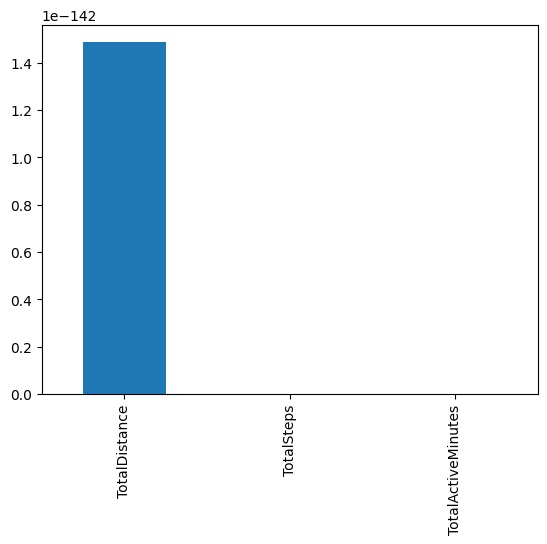

In [57]:
# Split the dataset into features and target daily act 
x = daily_train.drop(columns=["Unnamed: 0","Id","ActivityDate","Calories","ModeratelyActiveDistance","TrackerDistance","LoggedActivitiesDistance","VeryActiveDistance","VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes","LightActiveDistance","SedentaryActiveDistance"])
y = daily_train["Calories"]

chi_scores = chi2(x, y)
print(chi_scores)
p_values = pd.Series(chi_scores[1], index=x.columns)
p_values.sort_values(ascending=False, inplace=True)

p_values.plot.bar()

<Axes: >

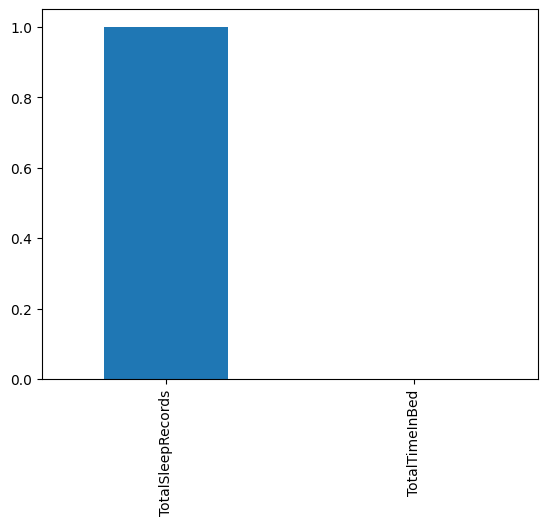

In [48]:

# Split the dataset into features and target sleep day
x = sleepDay_train.drop(columns=["Unnamed: 0","Id", "ActivityDate", "ActivityTime", "TotalMinutesAsleep"])
y = sleepDay_train["TotalMinutesAsleep"]

chi_scores = chi2(x, y)

p_values = pd.Series(chi_scores [1], index=x.columns)
p_values.sort_values(ascending=False, inplace=True)

p_values.plot.bar()



# 3. Split and Prepare Data

In [ ]:
from sklearn.model_selection import train_test_split

## 3.1. Daily Activity

In [ ]:
X_ac = daily_train[
    [
        "TotalSteps",
        "TotalDistance",
        "TrackerDistance",
        "SedentaryMinutes",
        "TotalActiveMinutes"
    ]
]

Y_ac = daily_train["Calories"]

X_train_ac, X_test_ac, Y_train_ac, Y_test_ac = train_test_split(
    X_ac, Y_ac, test_size = 0.1, random_state=42
)

## 3.2. Sleep Day


In [ ]:
X_sle = sleepDay_train[
    [
        "TotalSleepRecords",
        "TotalTimeInBed"
    ]
]

Y_sle = sleepDay_train["TotalMinutesAsleep"]

X_train_sle, X_test_sle, Y_train_sle, Y_test_sle = train_test_split(
    X_sle, Y_sle, test_size = 0.2, random_state = 42
)

# 4. Model
#### Decision Tree, Logistic Regression, Random Forest, KNN, Naive Bayes, SVM

# 5. Apply Model